In [1]:
import os
os.chdir(r'C:\Users\lociuser\OneDrive\LOCI_JENU\Data\20181206_frame_time_seq')

In [19]:
import glob
fl=glob.glob('*.txt')
fl

['frame_time_5us_256x256_osc.txt',
 'outputls_ult.txt',
 'output_frame_3500_osc.txt',
 'output_frm_ult.txt',
 'output_lines_osc.txt']

In [4]:
fn=r'frame_time_5us_256x256_osc.txt'

In [6]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [7]:
with open(fn,'rb') as fid:
    data=fid.readlines()

In [8]:
times=[]
for i in data:
    #print(str(i))
    
    #print ( s, i.dtype)
    #print (str(i).split('=')[1][1])
    if len(str(i).split(':'))>1:
        #print (str(i).split(':')[2][:6])
        times.append(float(str(i).split(':')[2][:6]))
    

In [9]:
times=np.array(times[1:])

In [16]:
#print(times)
len(times)

362

In [12]:
lowtimes=ediff1d(times)[::2]

In [13]:
hightimes=ediff1d(times)[1::2]

In [14]:
%matplotlib inline

Text(0.5,0,'sec')

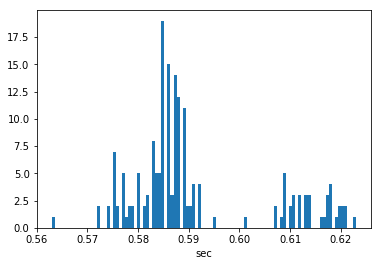

In [17]:
hist(lowtimes[lowtimes>0],100);
xlabel('sec')

Text(0.5,0,'sec')

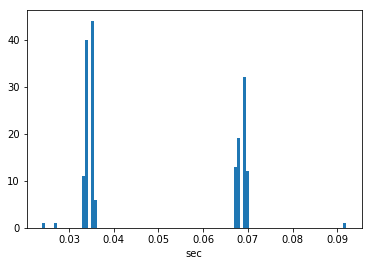

In [18]:
hist(hightimes,100);
xlabel('sec')

In [45]:
matplotlib.style.use('bmh')

In [53]:
## FRAME MARKER

def plot_timing(fn1):
    figure(figsize=[10,4])
    data=np.loadtxt(fn1)
    x=ediff1d(data)
    
    print(len(x))
    subplot(121)
    hist(x,200,color=u'#1ACCBA');
    xlabel('milli seconds')
    yscale('log')
    
    subplot(122)
    hist(x,200,color=u'#1ACCBA');
    xlabel('milli seconds')
        
    tight_layout()
    
    return(std(x))

In [20]:
fl

['frame_time_5us_256x256_osc.txt',
 'outputls_ult.txt',
 'output_frame_3500_osc.txt',
 'output_frm_ult.txt',
 'output_lines_osc.txt']

6.038320892586279

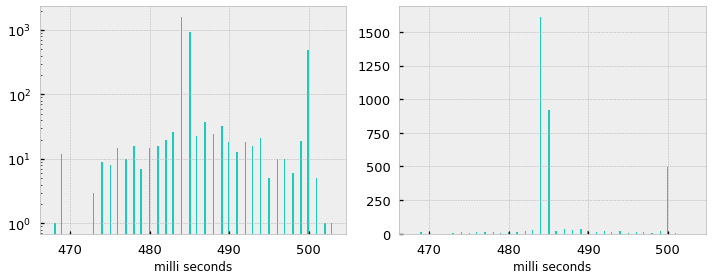

In [54]:
plot_timing('output_frm_ult.txt')

1.839524795818699

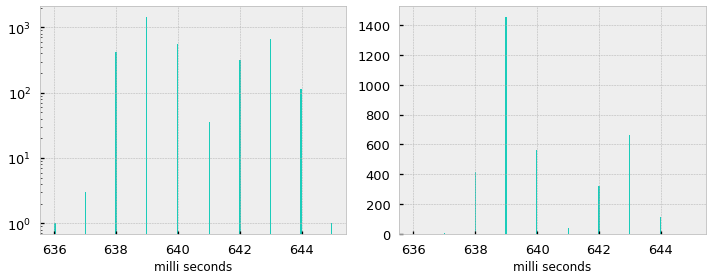

In [55]:
plot_timing('output_frame_3500_osc.txt')

In [39]:
# LINE MARKER

In [61]:
def plot_timing_lines(fn1):
    data=np.loadtxt(fn1)
    data=data[100:-2000]
    x=ediff1d(data)
    x=x[(x>0)&(x<200)] # less than 20ms
    print(len(x))
    
    subplot(121)
    hist(x,200,color=u'#1ACCBA');
    xlabel('milli seconds')
    yscale('log')
    
    subplot(122)
    hist(x,200,color=u'#1ACCBA');
    xlabel('milli seconds')
        
    tight_layout()
    
    return(std(x))

In [57]:
fl

['frame_time_5us_256x256_osc.txt',
 'outputls_ult.txt',
 'output_frame_3500_osc.txt',
 'output_frm_ult.txt',
 'output_lines_osc.txt']

64348


5.845557431320046

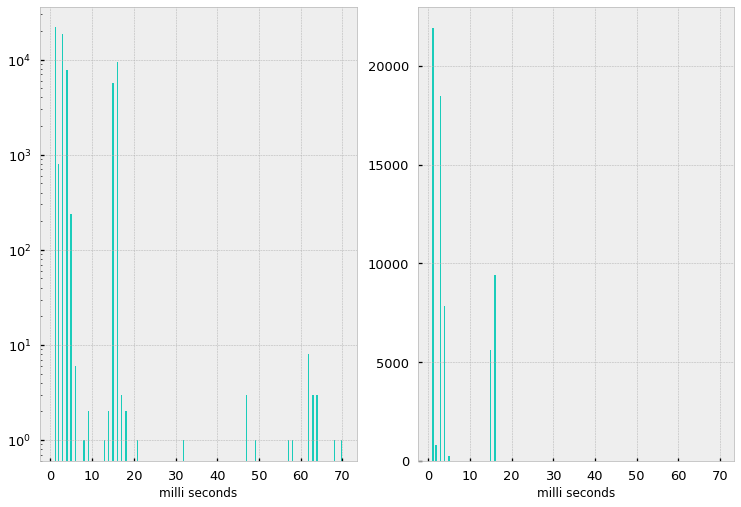

In [62]:
plot_timing_lines('outputls_ult.txt')

39689


3.8341331790136666

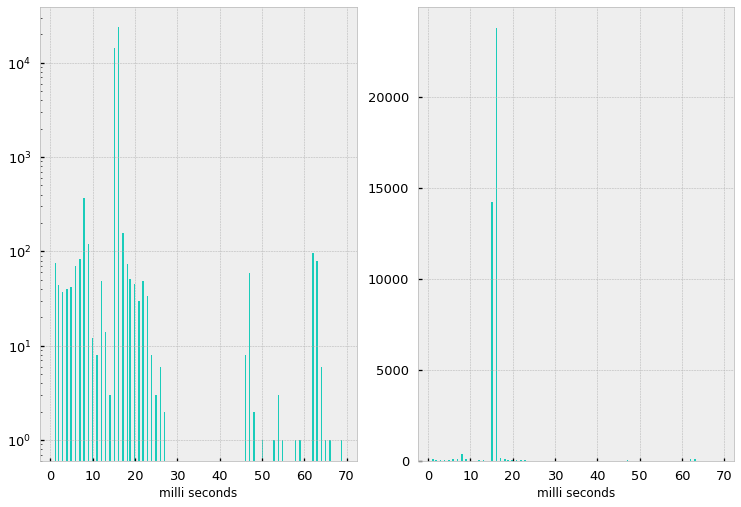

In [63]:
plot_timing_lines('output_lines_osc.txt')

In [7]:
std(ediff1d(data)) #'ms'

5727077342.882941

In [22]:
std(x) # ms

3.819564276053461

In [ ]:
# 1.84 for frame
# 1.3-5 ms for lines